In [347]:
# Python program to scrape heading tags Jeff Becker 1/2023 V.1
import pickle
from IPython import display
import math
from pprint import pprint
import requests
import nltk
from bs4 import BeautifulSoup
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import random
from wordcloud import WordCloud
import os
import spacy
from textblob import TextBlob
from pattern.en import sentiment
import urllib3 
import re
import datetime
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA

nlp = spacy.load('en_core_web_sm')
%matplotlib inline
sns.set(style='darkgrid', context='talk', palette='Dark2')

headers = {"User-Agent": "Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/108.0.0.0 Safari/537.36"} 
#find what headers you are sending here: https://www.whatismybrowser.com/detect/what-http-headers-is-my-browser-sending


utc_datetime = datetime.datetime.utcnow() #utc data concatenated with sliced URL name, filename stored
date_string = utc_datetime.strftime("%Y-%m-%d-%H%M_UTC") 
filename = f'{url_link[8:len(date_string)]}_{date_string}'
input_url = input("Enter the full URL to scrape: ") #user inputs URL to scrape


cleanData = []
tag_words = []
regex = re.compile('[^a-zA-Z]')

def scrape(url_link):
    # create a list by type of heading tags
    # the user will have to determine what "h" tags are valid for given URL
    heading_tags = ["h1","h2","h3","h4"] 
    request = requests.get(url_link, headers = headers)
    Soup = BeautifulSoup(request.text, 'lxml') #create soup obejct

    if request.status_code == 200: #error handling for URL request
        print('Request successful.')
    elif request.status_code == 404:
        print('Error 404: Not Found.')
        
    for tags in Soup.find_all(heading_tags):
        tag_words.append(tags.text.strip())
        
    return tag_words
    
def post_process(scraped_list):   
    for i in scraped_list:  #slice based on data you want to include. Some junk data can be removed
        if len(i) > 16:    #Fliter a composite length of strings based on targeted threshold
            cleanData.append(regex.sub(' ', i)) #remove digits and punctuation

    deDup = list(set(cleanData))#convert to set then back to list to eliminate duplicate headline strings

    with open(filename, "wb") as fp: #Pickling data as list with UTC time stamp
        pickle.dump(deDup, fp)

    # with open(filename,'w') as a: # uncomment if you want to save a text file for manual review
    #     a.write('\n'.join(cleanData))

scraped_content = scrape(input_url) #scrape input URL
post_process(scraped_content) #process scraped tag data



Enter the full URL to scrape: https://www.theguardian.com/us
Request successful.


<h3> The variable name "filename" is the stored value of the file. We can either work with that data or load previously scraped data at this point, i.e "foxnews_2023-01-07-2241_UTC". Be aware that pickled files will not display in Jupyter (UTF-8 error). To manually review the text, you have to uncomment the above text file code.<br><br> Once loaded, we slice and print the first five headlines to see if the content is as expected. </h3>

In [348]:
with open(filename, "rb") as fp: #Either load stored variable value for "filename" or saved pickled "example_1_0_23"
    saved_text = pickle.load(fp)

saved_text[0:5] #confirm your expected text is correct

['Iran  Regime condemned for executing two men over alleged protest crimes',
 'Water  Fears US supreme court could radically reshape clean water rules',
 ' It altered my entire worldview   Leading authors pick eight nonfiction books to change your mind',
 'If Harry sounds callous about killing  he is  All of us who served were   at least he knows why',
 'Skiing  Shiffrin ties Vonn s World Cup record with   nd career win']

<h3> Once we have the right text, we can check the polarity of the scraped headlines. 
<br><br>
Sentence-level polarity detection is to decide whether a given sentence expresses either an overall positive or negative opinion. The compund score is tehoverall sentiment of the headline. The scale is -1 to 1, with -1 being the most negative and 1 being the most positive. </h3>

In [349]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer as SIA 

sia = SIA() 
score_data = []

for line in saved_text:
    score = sia.polarity_scores(line)
    score['Headline'] = line
    score_data.append(score)

pprint(score_data, width=100) #pretty print sentiment scores

[{'Headline': 'Iran  Regime condemned for executing two men over alleged protest crimes',
  'compound': -0.5994,
  'neg': 0.353,
  'neu': 0.647,
  'pos': 0.0},
 {'Headline': 'Water  Fears US supreme court could radically reshape clean water rules',
  'compound': 0.5423,
  'neg': 0.164,
  'neu': 0.468,
  'pos': 0.368},
 {'Headline': ' It altered my entire worldview   Leading authors pick eight nonfiction books to '
              'change your mind',
  'compound': 0.0,
  'neg': 0.0,
  'neu': 1.0,
  'pos': 0.0},
 {'Headline': 'If Harry sounds callous about killing  he is  All of us who served were   at least '
              'he knows why',
  'compound': -0.6597,
  'neg': 0.196,
  'neu': 0.804,
  'pos': 0.0},
 {'Headline': 'Skiing  Shiffrin ties Vonn s World Cup record with   nd career win',
  'compound': 0.5859,
  'neg': 0.0,
  'neu': 0.725,
  'pos': 0.275},
 {'Headline': 'ADHD  What does the Adderall shortage in the US mean for ADHD patients ',
  'compound': -0.25,
  'neg': 0.143,
  'neu'

<h3>Now we can create Pandas data frame to visualize some of the headlines and scores.</h3>

In [350]:
df = pd.DataFrame.from_records(score_data)
df

,neg,neu,pos,compound,Headline
0,0.353,0.647,0.000,-0.5994,Iran Regime condemned for executing two men o...
1,0.164,0.468,0.368,0.5423,Water Fears US supreme court could radically ...
2,0.000,1.000,0.000,0.0000,It altered my entire worldview Leading auth...
3,0.196,0.804,0.000,-0.6597,If Harry sounds callous about killing he is ...
4,0.000,0.725,0.275,0.5859,Skiing Shiffrin ties Vonn s World Cup record ...
...,...,...,...,...,...
111,0.000,0.679,0.321,0.6369,The Shards by Bret Easton Ellis review An ins...
112,0.000,0.800,0.200,0.4588,Italo Calvino The Written World and the Unwri...
113,0.000,0.573,0.427,0.7717,A new start after I became a naturist at ...
114,0.000,1.000,0.000,0.0000,Rising MMA star Victoria The Prodigy Lee die...


In [351]:
df['label'] = 0
df.loc[df['compound'] > 0.2, 'label'] = 1
df.loc[df['compound'] < -0.2, 'label'] = -1
df

,neg,neu,pos,compound,Headline,label
0,0.353,0.647,0.000,-0.5994,Iran Regime condemned for executing two men o...,-1
1,0.164,0.468,0.368,0.5423,Water Fears US supreme court could radically ...,1
2,0.000,1.000,0.000,0.0000,It altered my entire worldview Leading auth...,0
3,0.196,0.804,0.000,-0.6597,If Harry sounds callous about killing he is ...,-1
4,0.000,0.725,0.275,0.5859,Skiing Shiffrin ties Vonn s World Cup record ...,1
...,...,...,...,...,...,...
111,0.000,0.679,0.321,0.6369,The Shards by Bret Easton Ellis review An ins...,1
112,0.000,0.800,0.200,0.4588,Italo Calvino The Written World and the Unwri...,1
113,0.000,0.573,0.427,0.7717,A new start after I became a naturist at ...,1
114,0.000,1.000,0.000,0.0000,Rising MMA star Victoria The Prodigy Lee die...,0


In [352]:
df2 = df[['Headline', 'label']]
df2.to_csv(filename +'.csv', mode='a', encoding='utf-8', index=False)

In [353]:
print("Positive headlines:\n")
pprint(list(df[df['label'] == 1].Headline)[:10], width=200)

print("\nNegative headlines:\n")
pprint(list(df[df['label'] == -1].Headline)[:10], width=200)

Positive headlines:

['Water  Fears US supreme court could radically reshape clean water rules',
 'Skiing  Shiffrin ties Vonn s World Cup record with   nd career win',
 'Russell Banks  Award winning fiction writer dies at   ',
 ' Touched by the welcome   Messi given guard of honour on PSG return',
 'Who wants to live for ever  Only billionaires like Jeff Bezos',
 ' You re my hero   How Zelenskiy became Hollywood s man of the hour',
 'Travel     of the best secret retreats in the Canary Islands',
 'The US should break up monopolies   not punish working Americans for rising prices',
 'Books  Meet the    best new novelists for     ',
 'Under the  we pay  you entertain  deal  Harry is now the hardest working royal']

Negative headlines:

['Iran  Regime condemned for executing two men over alleged protest crimes',
 'If Harry sounds callous about killing  he is  All of us who served were   at least he knows why',
 'ADHD  What does the Adderall shortage in the US mean for ADHD patients ',
 'T

In [354]:
print(df.label.value_counts())

print(df.label.value_counts(normalize=True) * 100) #normalize data

-1    50
 0    42
 1    24
Name: label, dtype: int64
-1    43.103448
 0    36.206897
 1    20.689655
Name: label, dtype: float64


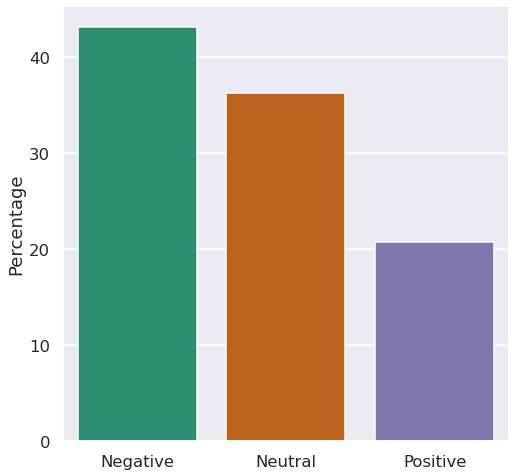

In [355]:
fig, ax = plt.subplots(figsize=(8, 8))

counts = df.label.value_counts(normalize=True) * 100

sns.barplot(x=counts.index, y=counts, ax=ax)

ax.set_xticklabels(['Negative', 'Neutral', 'Positive'])
ax.set_ylabel("Percentage")

plt.show()

In [356]:
textblob_sentiment=[]
for s in saved_text:
    txt= TextBlob(s)
    a= txt.sentiment.polarity
    b= txt.sentiment.subjectivity
    textblob_sentiment.append([s,a,b])

In [357]:
df_textblob = pd.DataFrame(textblob_sentiment, columns =['Sentence', 'Polarity', 'Subjectivity'])

In [358]:
df_textblob

,Sentence,Polarity,Subjectivity
0,Iran Regime condemned for executing two men o...,-0.100000,0.100000
1,Water Fears US supreme court could radically ...,0.366667,0.700000
2,It altered my entire worldview Leading auth...,0.000000,0.625000
3,If Harry sounds callous about killing he is ...,-0.300000,0.400000
4,Skiing Shiffrin ties Vonn s World Cup record ...,0.800000,0.400000
...,...,...,...
111,The Shards by Bret Easton Ellis review An ins...,0.000000,0.000000
112,Italo Calvino The Written World and the Unwri...,0.000000,0.000000
113,A new start after I became a naturist at ...,0.136364,0.454545
114,Rising MMA star Victoria The Prodigy Lee die...,0.000000,0.000000


In [359]:
df_textblob.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sentence      116 non-null    object 
 1   Polarity      116 non-null    float64
 2   Subjectivity  116 non-null    float64
dtypes: float64(2), object(1)
memory usage: 2.8+ KB


Text(0.5, 15.439999999999998, 'Sentence Polarity (Textblob)')

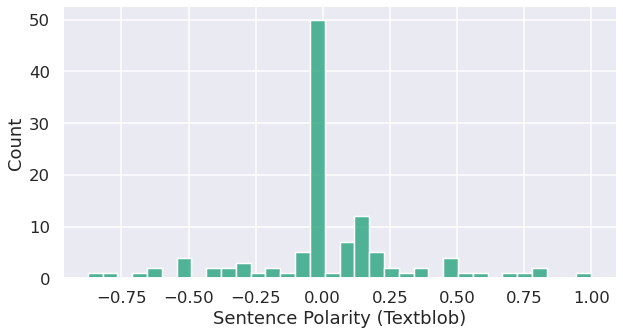

In [360]:
sns.displot(df_textblob["Polarity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Polarity (Textblob)")

Text(0.5, 15.439999999999998, 'Sentence Subjectivity (Textblob)')

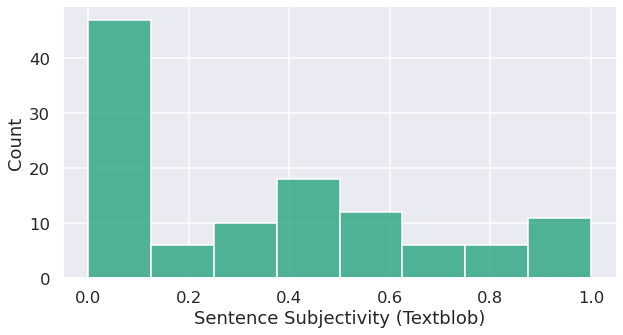

In [361]:
sns.displot(df_textblob["Subjectivity"], height= 5, aspect=1.8)
plt.xlabel("Sentence Subjectivity (Textblob)")

In [362]:
from nltk.tokenize import word_tokenize, RegexpTokenizer
from nltk.corpus import stopwords
stop_words = stopwords.words('english')


stop_tokens = []
stop_tokens_plot = []

def process_text(headlines):
    for line in headlines:
        toks = word_tokenize(line)
        toks = [t.lower() for t in toks if t.lower() not in stop_words]
        stop_tokens.extend(toks)
        stop_tokens_plot.append(toks)
    
    return stop_tokens

process_text(saved_text)


['iran',
 'regime',
 'condemned',
 'executing',
 'two',
 'men',
 'alleged',
 'protest',
 'crimes',
 'water',
 'fears',
 'us',
 'supreme',
 'court',
 'could',
 'radically',
 'reshape',
 'clean',
 'water',
 'rules',
 'altered',
 'entire',
 'worldview',
 'leading',
 'authors',
 'pick',
 'eight',
 'nonfiction',
 'books',
 'change',
 'mind',
 'harry',
 'sounds',
 'callous',
 'killing',
 'us',
 'served',
 'least',
 'knows',
 'skiing',
 'shiffrin',
 'ties',
 'vonn',
 'world',
 'cup',
 'record',
 'nd',
 'career',
 'win',
 'adhd',
 'adderall',
 'shortage',
 'us',
 'mean',
 'adhd',
 'patients',
 'documentary',
 'thrasher',
 'news',
 'sport',
 'opinion',
 'guardian',
 'us',
 'edition',
 'texas',
 'search',
 'vigilante',
 'fatally',
 'shot',
 'robbery',
 'suspect',
 'carrying',
 'fake',
 'gun',
 'write',
 'prince',
 'harry',
 'ghostwriter',
 'famous',
 'george',
 'clooney',
 'made',
 'film',
 'life',
 'writing',
 'wall',
 'paper',
 'check',
 'still',
 'going',
 'miss',
 'minsk',
 'russia',
 'belar

In [363]:
flat_tokens = [item for sublist in stop_tokens_plot for item in sublist] 
flat_tokens

['iran',
 'regime',
 'condemned',
 'executing',
 'two',
 'men',
 'alleged',
 'protest',
 'crimes',
 'water',
 'fears',
 'us',
 'supreme',
 'court',
 'could',
 'radically',
 'reshape',
 'clean',
 'water',
 'rules',
 'altered',
 'entire',
 'worldview',
 'leading',
 'authors',
 'pick',
 'eight',
 'nonfiction',
 'books',
 'change',
 'mind',
 'harry',
 'sounds',
 'callous',
 'killing',
 'us',
 'served',
 'least',
 'knows',
 'skiing',
 'shiffrin',
 'ties',
 'vonn',
 'world',
 'cup',
 'record',
 'nd',
 'career',
 'win',
 'adhd',
 'adderall',
 'shortage',
 'us',
 'mean',
 'adhd',
 'patients',
 'documentary',
 'thrasher',
 'news',
 'sport',
 'opinion',
 'guardian',
 'us',
 'edition',
 'texas',
 'search',
 'vigilante',
 'fatally',
 'shot',
 'robbery',
 'suspect',
 'carrying',
 'fake',
 'gun',
 'write',
 'prince',
 'harry',
 'ghostwriter',
 'famous',
 'george',
 'clooney',
 'made',
 'film',
 'life',
 'writing',
 'wall',
 'paper',
 'check',
 'still',
 'going',
 'miss',
 'minsk',
 'russia',
 'belar

In [364]:
pos_lines = list(df[df.label == 1].Headline)

pos_tokens = process_text(pos_lines)
pos_freq = nltk.FreqDist(pos_tokens)

pos_freq.most_common(20)

[('us', 16),
 ('new', 13),
 ('harry', 8),
 ('world', 7),
 ('police', 7),
 ('live', 6),
 ('best', 6),
 ('rising', 6),
 ('hamlin', 6),
 ('water', 5),
 ('supreme', 5),
 ('court', 5),
 ('man', 5),
 ('biden', 5),
 ('review', 5),
 ('mccarthy', 5),
 ('presidential', 5),
 ('palace', 5),
 ('could', 4),
 ('rules', 4)]

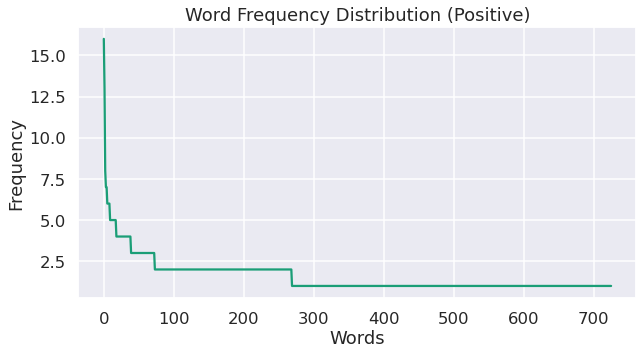

In [365]:
y_val = [x[1] for x in pos_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Positive)")
plt.show()

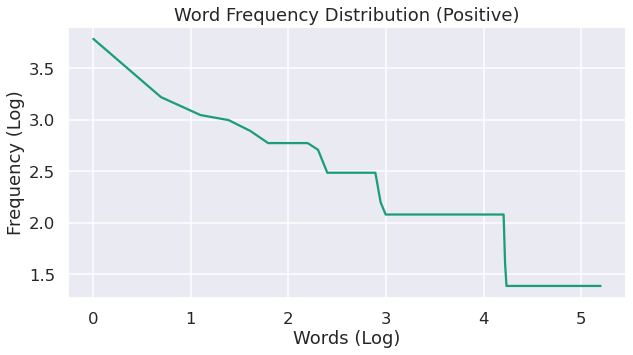

In [366]:
y_final = []
for i, k, z, t in zip(y_val[0::4], y_val[1::4], y_val[2::4], y_val[3::4]):
    y_final.append(math.log(i + k + z + t))

x_val = [math.log(i + 1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Positive)")
plt.plot(x_val, y_final)
plt.show()

In [367]:
neg_lines = list(df2[df2.label == -1].Headline)

neg_tokens = process_text(neg_lines)
neg_freq = nltk.FreqDist(neg_tokens)

neg_freq.most_common(20)

[('us', 22),
 ('new', 15),
 ('harry', 12),
 ('police', 12),
 ('live', 10),
 ('mccarthy', 9),
 ('world', 8),
 ('suspect', 8),
 ('man', 8),
 ('biden', 8),
 ('house', 7),
 ('water', 6),
 ('supreme', 6),
 ('court', 6),
 ('rules', 6),
 ('cup', 6),
 ('search', 6),
 ('prince', 6),
 ('ukraine', 6),
 ('time', 6)]

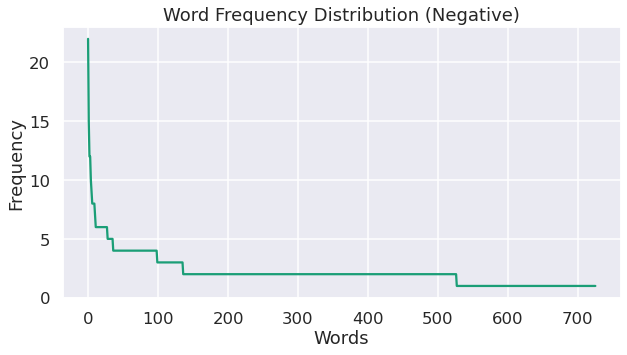

In [368]:
y_val = [x[1] for x in neg_freq.most_common()]

fig = plt.figure(figsize=(10,5))
plt.plot(y_val)

plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency Distribution (Negative)")
plt.show()

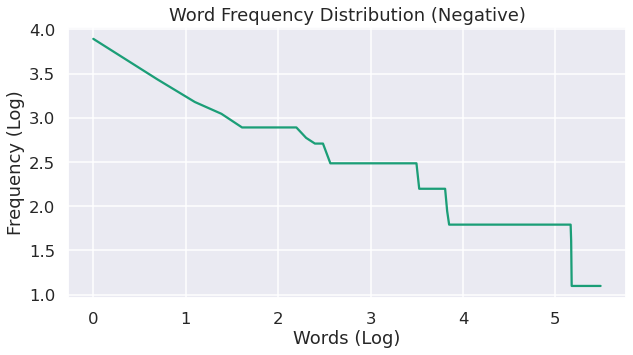

In [369]:
y_final = []
for i, k, z in zip(y_val[0::3], y_val[1::3], y_val[2::3]):
    if i + k + z == 0:
        break
    y_final.append(math.log(i + k + z))

x_val = [math.log(i+1) for i in range(len(y_final))]

fig = plt.figure(figsize=(10,5))

plt.xlabel("Words (Log)")
plt.ylabel("Frequency (Log)")
plt.title("Word Frequency Distribution (Negative)")
plt.plot(x_val, y_final)
plt.show()

In [370]:
from nltk.stem import WordNetLemmatizer
ls = WordNetLemmatizer()
stem_tokens = []
for t in stop_tokens:
    if len(t) > 1:
        lemma = ls.lemmatize(t) 
        stem_tokens.append(lemma)

In [371]:
stem_tokens

['iran',
 'regime',
 'condemned',
 'executing',
 'two',
 'men',
 'alleged',
 'protest',
 'crime',
 'water',
 'fear',
 'u',
 'supreme',
 'court',
 'could',
 'radically',
 'reshape',
 'clean',
 'water',
 'rule',
 'altered',
 'entire',
 'worldview',
 'leading',
 'author',
 'pick',
 'eight',
 'nonfiction',
 'book',
 'change',
 'mind',
 'harry',
 'sound',
 'callous',
 'killing',
 'u',
 'served',
 'least',
 'know',
 'skiing',
 'shiffrin',
 'tie',
 'vonn',
 'world',
 'cup',
 'record',
 'nd',
 'career',
 'win',
 'adhd',
 'adderall',
 'shortage',
 'u',
 'mean',
 'adhd',
 'patient',
 'documentary',
 'thrasher',
 'news',
 'sport',
 'opinion',
 'guardian',
 'u',
 'edition',
 'texas',
 'search',
 'vigilante',
 'fatally',
 'shot',
 'robbery',
 'suspect',
 'carrying',
 'fake',
 'gun',
 'write',
 'prince',
 'harry',
 'ghostwriter',
 'famous',
 'george',
 'clooney',
 'made',
 'film',
 'life',
 'writing',
 'wall',
 'paper',
 'check',
 'still',
 'going',
 'miss',
 'minsk',
 'russia',
 'belarus',
 'extend

In [372]:
filtered_tokens = [i for i in stem_tokens if len(i) > 1]



In [373]:
from collections import Counter
my_counter = Counter(stem_tokens)
# my_counter.most_common(25)

word_freq = pd.DataFrame(my_counter.most_common(30),
                             columns=['Words', 'count'])
word_freq.head()

,Words,count
0,u,22
1,new,15
2,harry,12
3,police,12
4,live,10


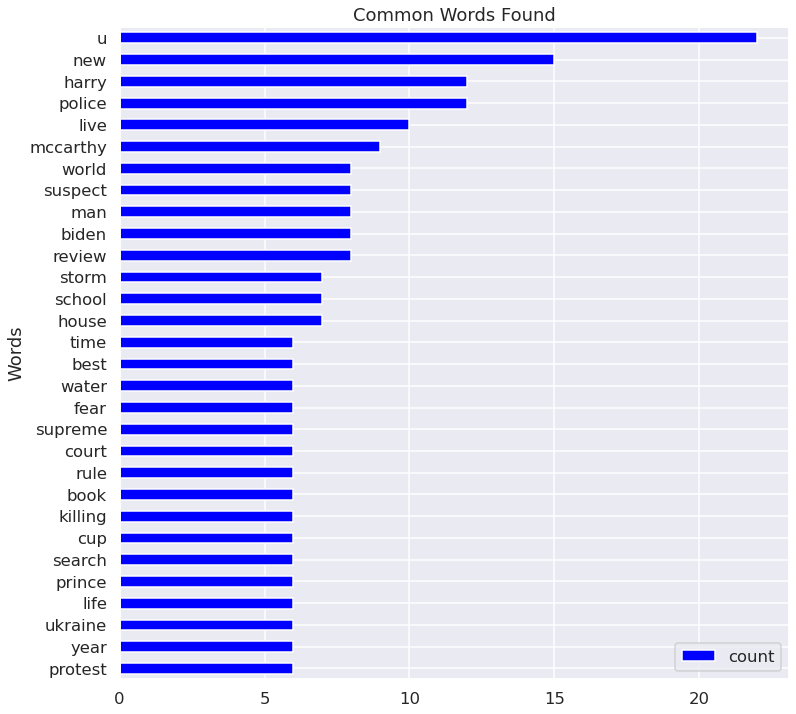

In [374]:
fig, ax = plt.subplots(figsize=(12, 12))

# Plot horizontal bar graph
word_freq.sort_values(by='count').plot.barh(x='Words',
                      y='count',
                      ax=ax,
                      color="blue")
ax.set_title("Common Words Found")
plt.show()

In [114]:
tokens = []

tokenizer = RegexpTokenizer(r'\w+')
for i in saved_text:
    tokens.append(tokenizer.tokenize(i))
flat_tokens = [item for sublist in stem_tokens for item in sublist] #flatten list of lists

